<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning/blob/master/IE406_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [0]:
id = "1cO2syVjhONiY4ezuqQ-zWAKH4-9WstMy"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ex2data1-logistic.csv')  
df1 = pd.read_csv('ex2data1-logistic.csv')

In [0]:
id = "1Ksk651w-gt7D553Ie2UL9cTccRJW4fzk"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ex2data2-logistic.csv')  
df2 = pd.read_csv('ex2data2-logistic.csv')

In [0]:
df1.head(5)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [0]:
df2.head(5)

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [0]:
df1.index

RangeIndex(start=0, stop=100, step=1)

In [0]:
df2.index

RangeIndex(start=0, stop=118, step=1)

In [0]:
def plot(df):
  x1_1 = df['x1']
  x2_1 = df['x2']
  y_1 = df['y']
  for i in range(len(x1_1)):
    if(y_1[i]==0):
      plt.scatter(x1_1[i],x2_1[i],color='red')
    else:
      plt.scatter(x1_1[i],x2_1[i],color='blue')
  plt.xlabel('$x1$')
  plt.ylabel('$x2$')
  plt.show()

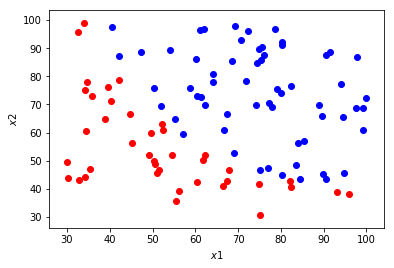

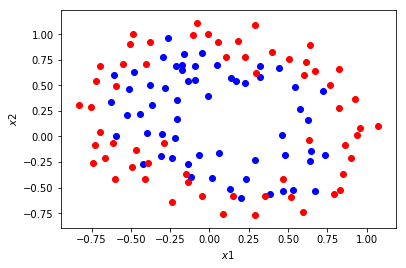

In [0]:
plot(df1)
plot(df2)

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def logistic_cost(y_actual,y_predicted):
  return np.sum(((-y_actual*np.log(y_predicted)) - ((1-y_actual)*np.log(1-y_predicted))))/y_predicted.shape[0]

In [0]:
def logistic_output(X,theta):
  t = sigmoid(np.dot(X,theta))
  for i in range(t.shape[0]):
    if(t[i]<0.5):
      t[i]=0
    else:
      t[i]=1
  return t

In [0]:
def logistic_gradient_descent(X,Y,rate):
  epochs = 100000
  alphas = [rate]
  for alpha in alphas:
    theta = np.zeros((3,1))
    x0 = X[:,0]*theta[0]
    x1 = X[:,1]*theta[1]
    x2 = X[:,2]*theta[2]
    h = sigmoid(x0+x1+x2)
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        x0 = X[:,0]*theta[0]
        x1 = X[:,1]*theta[1]
        x2 = X[:,2]*theta[2]
        h = sigmoid(x0+x1+x2)
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%10000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==rate):
      return theta

In [0]:
def perform_descent(df1,rate):
  msk = random.sample(range(0,100),int(len(df1)*90/100))
  vals = np.full((100,1),True)
  for i in msk:
    vals[i] = False
  train_df1 = df1[~vals]
  test_df1 = df1[vals]

  X = np.zeros((len(train_df1['x1']),3))
  X[:,0] = np.ones(len(train_df1['x1']))
  X[:,1] = train_df1['x1']
  X[:,2] = train_df1['x2']
  Y = train_df1['y']
  
  theta = logistic_gradient_descent(X,Y,rate)
  print(theta)
  
  X = np.zeros((len(test_df1['x1']),3))
  X[:,0] = np.ones(len(test_df1['x1']))
  X[:,1] = test_df1['x1']
  X[:,2] = test_df1['x2']
  Y = test_df1['y'].values

  x0 = X[:,0]*theta[0]
  x1 = X[:,1]*theta[1]
  x2 = X[:,2]*theta[2]
  h = sigmoid(x0+x1+x2)
  count=0
  for i in range(len(h)):
    if(h[i]<0.5 and Y[i]==0):
      count+=1
    elif(h[i]>=0.5 and Y[i]==1):
      count+=1
  acc = count/len(h)
  print(acc)

Epoch :  0  Cost :  [0.62644682]
Epoch :  10000  Cost :  [0.57982922]
Epoch :  20000  Cost :  [0.54070193]
Epoch :  30000  Cost :  [0.50771031]
Epoch :  40000  Cost :  [0.47973115]
Epoch :  50000  Cost :  [0.4558354]
Epoch :  60000  Cost :  [0.43527093]
Epoch :  70000  Cost :  [0.41743565]
Epoch :  80000  Cost :  [0.40184968]
Epoch :  90000  Cost :  [0.38813035]


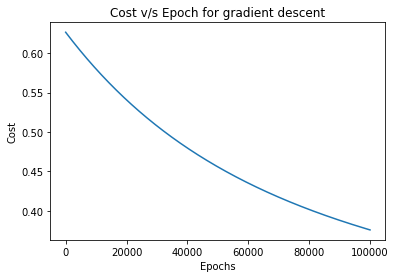

[[-4.88833494]
 [ 0.04749026]
 [ 0.03769376]]
0.7142857142857143


In [0]:
perform_descent(df1,0.001)

In [0]:
def logistic_gradient_descent(X,Y,rate):
  epochs = 100000
  alphas = [rate]
  for alpha in alphas:
    theta = np.zeros((3,1))
    x0 = X[:,0]*theta[0]
    # x1 = X[:,1]*theta[1]
    # x2 = X[:,2]*theta[2]
    x1 = X[:,1]**2 * theta[1]
    x2 = X[:,2]**2 * theta[2]
    # x5 = np.dot(X[:,1],X[:,2]) * theta[5]
    h = sigmoid(x0+x1+x2)
    cost = np.random.random((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      # theta[1] = theta[1] - alpha/X.shape[0] * np.sum((h-Y)*X[:,1])
      # theta[2] = theta[2] - alpha/X.shape[0] * np.sum((h-Y)*X[:,2])
      theta[1] = theta[1] - alpha/X.shape[0] * np.sum((h-Y)*X[:,1]**2)
      theta[2] = theta[2] - alpha/X.shape[0] * np.sum((h-Y)*X[:,2]**2)
      # theta[5] = theta[5] - alpha/X.shape[0] * np.sum((h-Y)*np.dot(X[:,1],X[:,2]))
      x0 = X[:,0]*theta[0]
      # x1 = X[:,1]*theta[1]
      # x2 = X[:,2]*theta[2]
      x1 = X[:,1]**2 * theta[1]
      x2 = X[:,2]**2 * theta[2]
      # x5 = np.dot(X[:,1],X[:,2]) * theta[5]
      h = sigmoid(x0+x1+x2)
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%10000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==rate):
      return theta

In [0]:
def perform_descent(df1,rate):
  msk = random.sample(range(0,100),int(len(df1)*90/100))
  vals = np.full((100,1),True)
  for i in msk:
    vals[i] = False
  train_df1 = df1[~vals]
  test_df1 = df1[vals]

  X = np.zeros((len(train_df1['x1']),3))
  X[:,0] = np.ones(len(train_df1['x1']))
  X[:,1] = train_df1['x1']
  X[:,2] = train_df1['x2']
  Y = train_df1['y']
  
  theta = logistic_gradient_descent(X,Y,rate)
  print(theta)
  
  X = np.zeros((len(test_df1['x1']),3))
  X[:,0] = np.ones(len(test_df1['x1']))
  X[:,1] = test_df1['x1']
  X[:,2] = test_df1['x2']
  Y = test_df1['y'].values

  x0 = X[:,0]*theta[0]
  # x1 = X[:,1]*theta[1]
  # x2 = X[:,2]*theta[2]
  x1 = X[:,1]**2 * theta[1]
  x2 = X[:,2]**2 * theta[2]
  # x5 = np.dot(X[:,1],X[:,2]) * theta[5]
  h = sigmoid(x0+x1+x2)
  count=0
  for i in range(len(h)):
    if(h[i]<0.5 and Y[i]==0):
      count+=1
    elif(h[i]>=0.5 and Y[i]==1):
      count+=1
  acc = count/len(h)
  print(acc)

Epoch :  0  Cost :  [0.69311472]
Epoch :  10000  Cost :  [0.56474625]
Epoch :  20000  Cost :  [0.53921248]
Epoch :  30000  Cost :  [0.53196222]
Epoch :  40000  Cost :  [0.52950603]
Epoch :  50000  Cost :  [0.52859268]
Epoch :  60000  Cost :  [0.52823452]
Epoch :  70000  Cost :  [0.52808953]
Epoch :  80000  Cost :  [0.52802967]
Epoch :  90000  Cost :  [0.52800465]


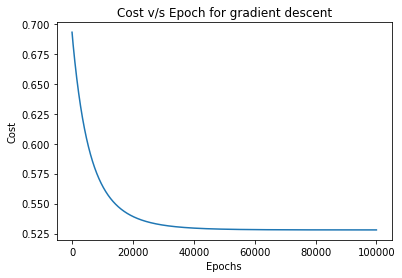

[[ 2.38858087]
 [-5.60051649]
 [-3.69842856]]
0.9166666666666666


In [17]:
perform_descent(df2,0.01)